In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch

mpl.rcParams.update()
#mpl.rcParams["font.family"] = "Helvetica Neue"
mpl.rcParams["lines.linewidth"] = 1

# Testing

### Loading the PTB-XL Dataset

In [3]:
# Load the dataset
from dataloader import ptb_xl_dataset
path_to_dataset = os.path.join(os.getcwd(), "..", "Datasets", "ptb-xl", "")
sampling_rate = 100
test_fold = 10
ptb_xl = ptb_xl_dataset(path_to_dataset, sampling_rate, test_fold, load_meta=True)

# Print attributes of the dataset
print(f"Length of training set: X: {len(ptb_xl.X_train_ecg)}, y: {len(ptb_xl.y_train)}")
print(f"Shape of training set: X: {ptb_xl.X_train_ecg.shape}, y: {ptb_xl.y_train.shape}")
print(f"Length of test set: X: {len(ptb_xl.X_test_ecg)}, y: {len(ptb_xl.y_test)}")
print(f"Shape of test set: X: {ptb_xl.X_test_ecg.shape}, y: {ptb_xl.y_test.shape}")

Loading ECG data: 100%|██████████| 21799/21799 [05:31<00:00, 65.70it/s]


Finished loading PTB-XL in 6 minutes and 34 seconds.
Length of training set: X: 19601, y: 19601
Shape of training set: X: (19601, 1000, 12), y: (19601,)
Length of test set: X: 2198, y: 2198
Shape of test set: X: (2198, 1000, 12), y: (2198,)


In [4]:
from models.clinical_bert import bio_clinical_BERT

bio_clinical_bert = bio_clinical_BERT()

# Tokenize the text
encoded_output = bio_clinical_bert.encode(ptb_xl.X_train_text[:1000], add_special_tokens=True)

# Embed the text
embedded_output = bio_clinical_bert.embed(encoded_output)

c:\Users\ssjsi\Documents\Bachelors-project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ssjsi\Documents\Bachelors-project\.venv\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Finished encoding text in 0 minutes and 0 seconds.


In [ ]:
embedded_output.shape

torch.Size([1000, 768])

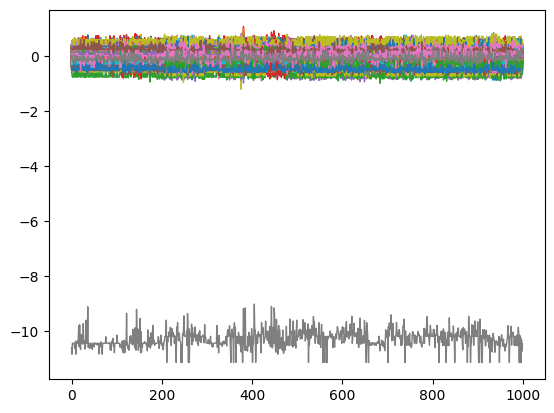

In [ ]:
import matplotlib.pyplot as plt

plt.plot(embedded_output)
plt.show()

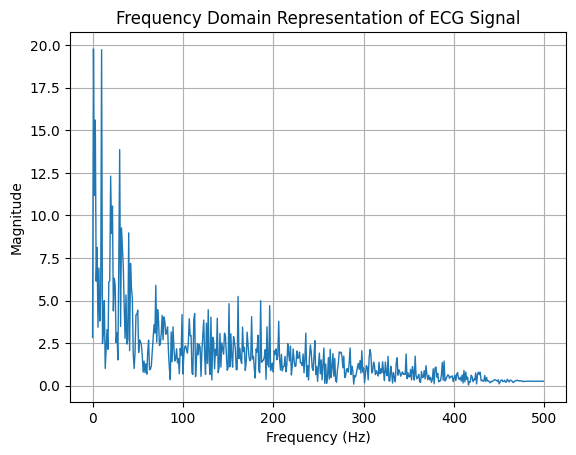

In [ ]:
import numpy as np

# Assuming ecg_signals is your array of shape (20000, 1000, 12)
# Perform FFT along the second dimension (axis=1) for each ECG signal
ecg_fft = np.fft.fft(ptb_xl.X_test_ecg, axis=1)

# Compute the frequency axis
sampling_rate = 1000  # Assuming a sampling rate of 1000 Hz
freq_axis = np.fft.fftfreq(ptb_xl.X_test_ecg.shape[1], d=1/sampling_rate)

# Keep only the positive frequencies (assuming real input signals)
positive_freq_mask = freq_axis >= 0
freq_axis = freq_axis[positive_freq_mask]
ecg_fft = ecg_fft[:, positive_freq_mask, :]

# Compute the magnitude spectrum (absolute value of FFT)
ecg_fft_magnitude = np.abs(ecg_fft)

# Plot the frequency domain representation of the ECG signals
# (You may need to adjust the plotting according to your specific needs)
import matplotlib.pyplot as plt

# Plot the magnitude spectrum for the first ECG signal and the first lead
plt.plot(freq_axis, ecg_fft_magnitude[0, :, 0])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Representation of ECG Signal')
plt.grid(True)
plt.show()

In [5]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')